https://www.kaggle.com/anikannal/solar-power-generation-data

Analysis Objective:  
Build and test a model that can predict AC Power given the input conditions at the plant.  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
from sklearn.linear_model import LinearRegression

In [4]:
from sklearn.metrics import mean_squared_error , r2_score

In [5]:
from sklearn.model_selection import train_test_split , cross_val_score , KFold

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
##read in the file
plant_2 = pd.read_csv("combined_df_2.csv")

In [7]:
plant_2.head()

,PLANT_ID,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,date,year,month,dayofweek,day,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06,2020-05-15 00:00:00,2020,5,4,15,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09,2020-05-15 00:00:00,2020,5,4,15,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
2,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09,2020-05-15 00:00:00,2020,5,4,15,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
3,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06,2020-05-15 00:00:00,2020,5,4,15,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
4,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07,2020-05-15 00:00:00,2020,5,4,15,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0


In [35]:
plant_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PLANT_ID             67698 non-null  int64  
 1   SOURCE_KEY_x         67698 non-null  object 
 2   DC_POWER             67698 non-null  float64
 3   AC_POWER             67698 non-null  float64
 4   DAILY_YIELD          67698 non-null  float64
 5   TOTAL_YIELD          67698 non-null  float64
 6   date                 67698 non-null  object 
 7   year                 67698 non-null  int64  
 8   month                67698 non-null  int64  
 9   dayofweek            67698 non-null  int64  
 10  day                  67698 non-null  int64  
 11  SOURCE_KEY_y         67698 non-null  object 
 12  AMBIENT_TEMPERATURE  67698 non-null  float64
 13  MODULE_TEMPERATURE   67698 non-null  float64
 14  IRRADIATION          67698 non-null  float64
dtypes: float64(7), int64(5), object(3)
m

Text(0.5, 1.0, 'PLANT 2')

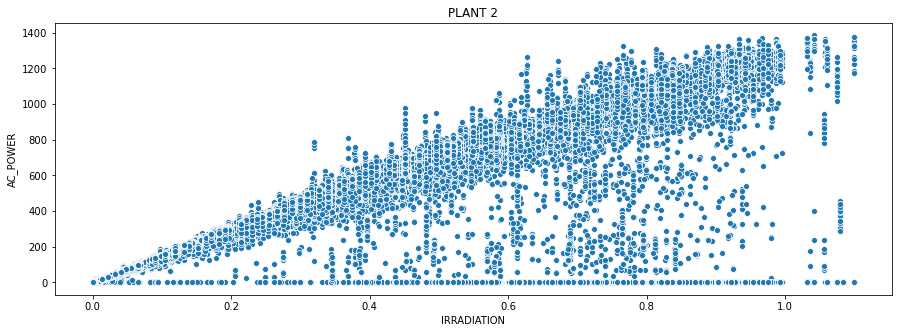

In [8]:
## Plot the Values
plt.figure(figsize = (15,5))
sns.scatterplot('IRRADIATION', 'AC_POWER', data = plant_2)
plt.title('PLANT 2')

Linear Regression Model:  

In [9]:
X_train, X_test, y_train, y_test  = train_test_split(plant_2['IRRADIATION'], plant_2['AC_POWER'] , random_state = 1 , test_size = 0.2)
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))



 X_train : (54158,)

 X_test : (13540,)

 y_train : (54158,)

 y_test : (13540,)


In [10]:
def perform_reg(model,X_train, X_test, y_train, y_test, cls = None):
    
    model.fit(X_train,y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)   
    
    print("\n RMSE :{}".format(np.sqrt(mean_squared_error(y_test,pred_test))))
    print("\n train R2 :{}".format(r2_score(y_train,pred_train)))
    print("\n test R2 :{}".format(r2_score(y_test,pred_test)))
    if cls == 'dt':
        print("\n Max depth :{}".format(model.tree_.max_depth))
        

## Plot the predicted Vs actual values for training data 
    plt.figure(figsize = (8,6))
    plt.scatter(y_train, pred_train)
    plt.xlabel("actual")
    plt.ylabel('predicted')
    plt.title("Train data Vs Predicted")
    plt.show()

## Plot the predicted Vs actual values 
    plt.figure(figsize = (8,6))
    plt.scatter(y_test, pred_test)
    plt.title("Actual and Predicted values for Test data ")
    plt.xlabel("actual")
    plt.ylabel('predicted')
    plt.show()
    
## Plot the residual Vs actual values 
    plt.figure(figsize = (8,6))
    plt.scatter(y_test , (y_test - pred_test))
    plt.title("Residual Vs Actual values ")
    plt.xlabel("actual")
    plt.ylabel('residue')
    plt.show() 
    
## Plot Variable importance for decision tree , random forest
    if (cls == 'dt') | (cls == 'rf') | (cls == 'gbm'):
        cols = X_train.columns.tolist()
        plt.figure(figsize = (15,6))
        plt.bar(cols, model.feature_importances_)
        plt.xticks(rotation = 90)
        plt.show()

    
    return 


 RMSE :228.90452142038808

 train R2 :0.6113446326164026

 test R2 :0.6032659848189464


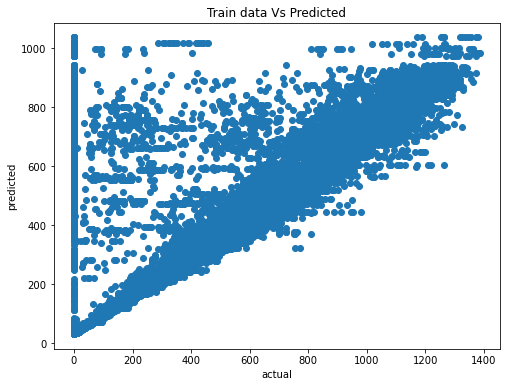

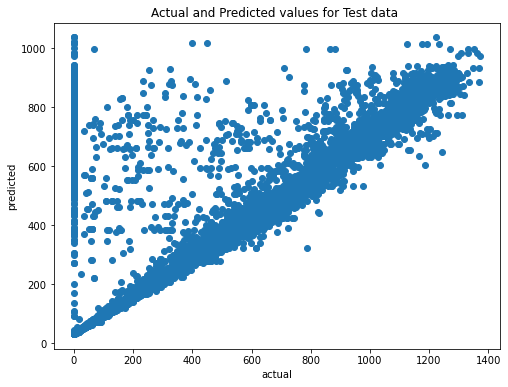

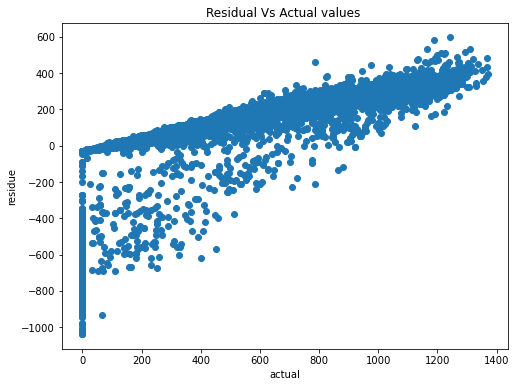

In [11]:
ln = LinearRegression()

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

perform_reg(ln, X_train, X_test, y_train, y_test, 'ln')

Linear Regression has performed poorly with a R2 of 0.6.  
Check if data transformation will help.  

(array([39232.,  3994.,  3634.,  4296.,  3534.,  2570.,  3476.,  3382.,
         3272.,   308.]),
 array([0.        , 0.1098766 , 0.21975321, 0.32962981, 0.43950642,
        0.54938302, 0.65925963, 0.76913623, 0.87901283, 0.98888944,
        1.09876604]),
 <a list of 10 Patch objects>)

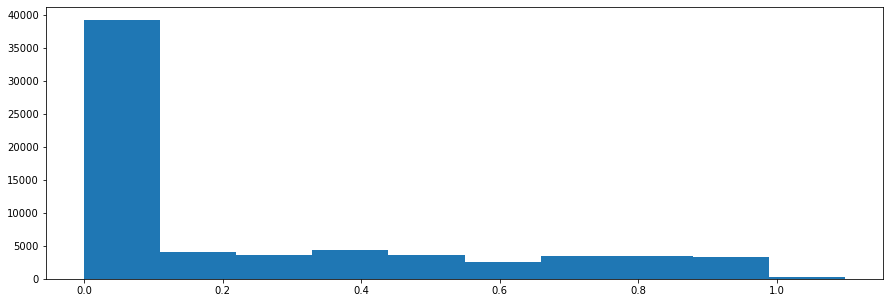

In [12]:
## Plot the distributions 
plt.figure(figsize = (15,5))
plt.hist(plant_2['IRRADIATION'])

(array([42765.,  4034.,  3350.,  3930.,  3634.,  2591.,  2400.,  2186.,
         2190.,   618.]),
 array([   0.   ,  138.542,  277.084,  415.626,  554.168,  692.71 ,
         831.252,  969.794, 1108.336, 1246.878, 1385.42 ]),
 <a list of 10 Patch objects>)

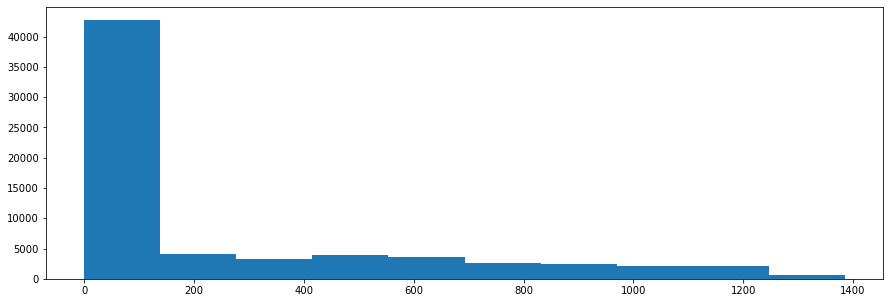

In [26]:
plt.figure(figsize = (15,5))
plt.hist((plant_2['AC_POWER']))

Both the distributions are positively skewed.  

In [23]:
plant_2[(plant_2['AC_POWER']==0) & (plant_2['IRRADIATION'] > 0)].shape

(6700, 15)

When Irradiation exists (> 0) the AC Power is zero . Is this a malfunction of the inverter ? Can these anomalies be dropped from the records for sake of prediction.  

In [8]:
plant_2_new = plant_2.copy()
anomaly = plant_2_new[(plant_2_new['AC_POWER']==0) & (plant_2_new['IRRADIATION'] > 0)]
plant_2_new = plant_2_new[~plant_2_new.index.isin(anomaly.index)]

Text(0.5, 1.0, 'PLANT 2 W/O ANOMALIES')

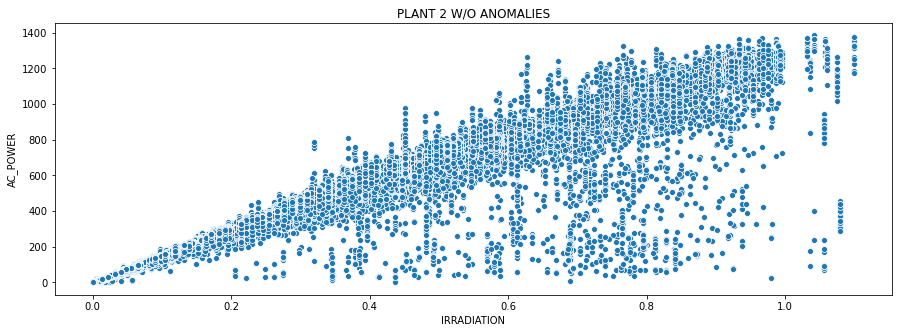

In [37]:
## Plot the Values again
plt.figure(figsize = (15,5))
sns.scatterplot('IRRADIATION', 'AC_POWER', data = plant_2_new)
plt.title('PLANT 2 W/O ANOMALIES')


 X_train : (48798,)

 X_test : (12200,)

 y_train : (48798,)

 y_test : (12200,)

 RMSE :91.62337675062231

 train R2 :0.9368450923936594

 test R2 :0.939503126908417


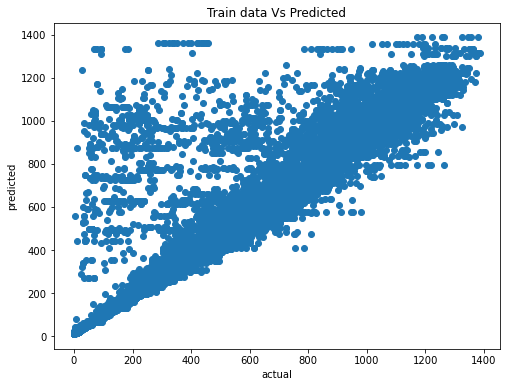

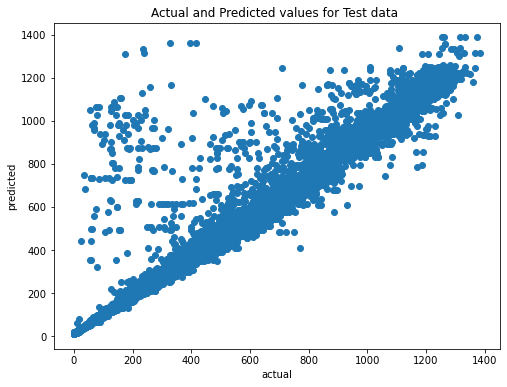

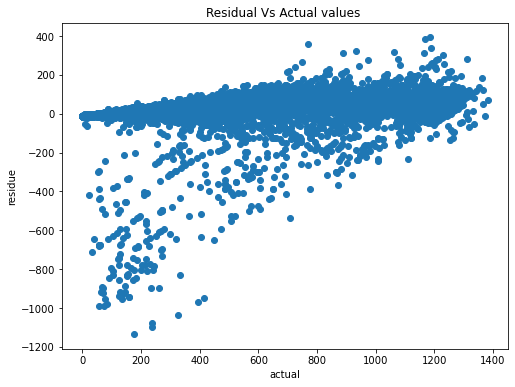

In [38]:
## Check Linear Regression again.

X_train, X_test, y_train, y_test  = train_test_split(plant_2_new['IRRADIATION'], plant_2_new['AC_POWER'] , random_state = 1 , test_size = 0.2)
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
###
ln = LinearRegression()

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

perform_reg(ln, X_train, X_test, y_train, y_test, 'ln')

It's seen that the R2 , RMSE have improved with removal of anomalies.  
For lower value of AC Power (< 600), the prediction error is large.  

In [40]:
## Cross Validate with shuffling 

kf = KFold(n_splits = 5 , shuffle = True , random_state = 12)
model = LinearRegression()
#
predictors = plant_2_new.copy()
predictors = predictors['IRRADIATION'].values.reshape(-1,1)
cv = cross_val_score(estimator = model  , X=X_train , y=y_train, cv = kf , scoring = "r2")
print("\n 5 fold cross validation R2 :{}".format(cv))


 5 fold cross validation R2 :[0.93512736 0.93958129 0.93697378 0.93780283 0.93472787]


Check if any other predictors can improve the performance of Linear Regression.  

Text(0.5, 1.0, 'PLANT 2')

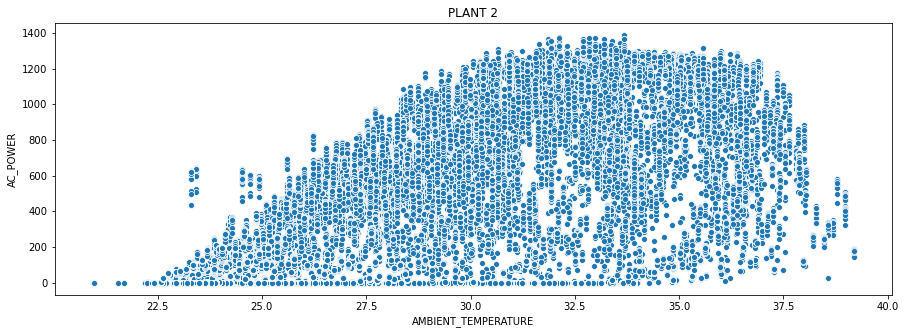

In [47]:
## Plot Temperature Vs AC Power 
plt.figure(figsize = (15,5))
sns.scatterplot('AMBIENT_TEMPERATURE', 'AC_POWER', data = plant_2_new)
plt.title("PLANT 2")

Text(0.5, 1.0, 'PLANT 2')

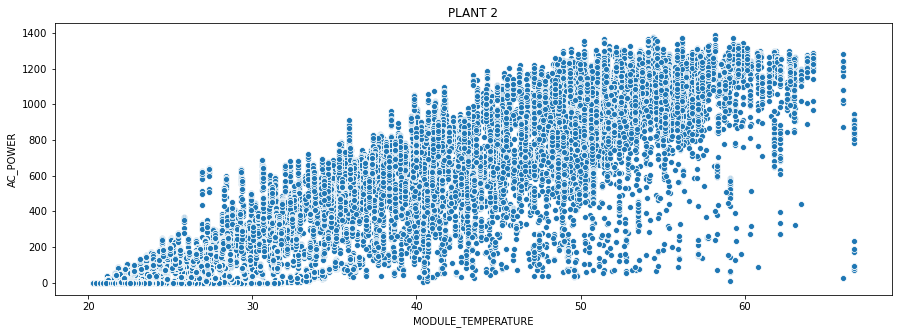

In [48]:
## Plot Irradiation Vs AC Power 
plt.figure(figsize = (15,5))
sns.scatterplot('MODULE_TEMPERATURE', 'AC_POWER', data = plant_2_new)
plt.title("PLANT 2")


 X_train : (48798,)

 X_test : (12200,)

 y_train : (48798,)

 y_test : (12200,)

 RMSE :147.61682826447756

 train R2 :0.8413840067456773

 test R2 :0.8429665832534725


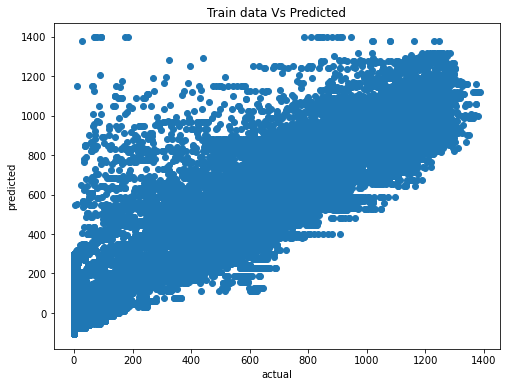

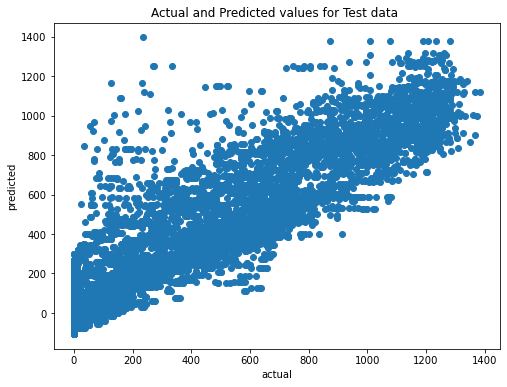

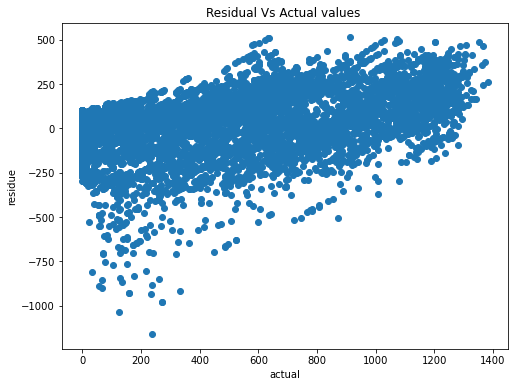

In [49]:
## Build a Linear Regression model with Module Temperature as the predictor. 
X_train, X_test, y_train, y_test  = train_test_split(plant_2_new['MODULE_TEMPERATURE'], plant_2_new['AC_POWER'] , random_state = 1 , test_size = 0.2)
print("\n X_train : {}".format(X_train.shape))
print("\n X_test : {}".format(X_test.shape))
print("\n y_train : {}".format(y_train.shape))
print("\n y_test : {}".format(y_test.shape))
##
ln = LinearRegression()

X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

perform_reg(ln, X_train, X_test, y_train, y_test, 'ln')

Linear Regression Model with MODULE_TEMPERATURE as the predictor performs slightly lower than IRRADIATION.  
Since IRRADIATION and MODULE_TEMPERATURE are highly correlated , we can not include both in the Regression.  

In [50]:
plant_2_new.corr()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,year,month,dayofweek,day,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
PLANT_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DC_POWER,NaN,1.000000,0.999996,-0.019017,0.002960,NaN,-0.095618,0.019687,0.070961,0.646878,0.917441,0.968239
AC_POWER,NaN,0.999996,1.000000,-0.019251,0.002965,NaN,-0.095433,0.019687,0.070876,0.647032,0.917445,0.968184
DAILY_YIELD,NaN,-0.019017,-0.019251,1.000000,-0.078040,NaN,-0.036328,0.021390,0.036971,0.384181,0.120693,-0.050527
TOTAL_YIELD,NaN,0.002960,0.002965,-0.078040,1.000000,NaN,-0.036711,0.001473,0.034284,0.005093,-0.003299,-0.007086
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,-0.095618,-0.095433,-0.036328,-0.036711,NaN,1.000000,-0.200771,-0.810749,-0.379236,-0.203391,-0.099138
dayofweek,NaN,0.019687,0.019687,0.021390,0.001473,NaN,-0.200771,1.000000,0.219333,0.111719,0.063723,0.026003
day,NaN,0.070961,0.070876,0.036971,0.034284,NaN,-0.810749,0.219333,1.000000,0.305148,0.154585,0.068827
AMBIENT_TEMPERATURE,NaN,0.646878,0.647032,0.384181,0.005093,NaN,-0.379236,0.111719,0.305148,1.000000,0.844521,0.647353


Summary :
Irradiation is a good predictor of AC Power and for Plant 2 by removing the anomalies, Linear Regression model predicts the AC Power with an error of +- 91 units.  